# **Step 1: Collecting Data:**

In [ ]:
!pip install tweepy



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import tweepy
import pandas as pd

# Set up API keys and access tokens
API_Key = 'BSFgXqbHXlF3GHBqqaZTKu0T8'
API_Key_Secret = 'JWfisUdgN6uc6NQiA2RLZeMllOxJ6VJrNrYL8cJ51snUonUTK6'
Access_Token = '1653095657861701634-ZsXlIaEypQYwCKTZ0gcS8g40oDbBAi'
Access_Token_Secret = 'tdhUqXE1dZxLr2qz5ms5hEhCHhns9pkvpGry7cV0glYfF'

# Authenticate with the Twitter API
authorize = tweepy.OAuthHandler(API_Key, API_Key_Secret)
authorize.set_access_token(Access_Token, Access_Token_Secret)
api = tweepy.API(authorize)


# Define the universities to search for
universities = ['University of Illinois']

# Create an empty list to store tweets
tweets = []

hashtagList = ['#UniversityofIllinois','#UofIllinois',  '#Illini','#IllinoisLibrary', '#UIC', '#ILLINOIS']
for university in universities:
    for hashtag in hashtagList:
        query = hashtag
        # Loop through search results using pagination
        for page in tweepy.Cursor(api.search_tweets, q=hashtag, lang='en', tweet_mode='extended',count =200).pages(2000):
        # Loop through tweets on the page
            for tweet in page:
            # Check if the tweet is a retweet or a duplicate
                if 'retweeted_status' in tweet._json:
                    continue
                if tweet not in tweets:
                    tweets.append(tweet)




TooManyRequests: ignored

In [2]:
len(tweets)

3318

In [3]:
tweets1 = tweets

In [49]:
hashtagList = ['#UofIllinois', '#UniversityofIllinois',  '#Illini','#IllinoisLibrary', '#UIC', '#ILLINOIS']
for university in universities:
    for hashtag in hashtagList:
        query = hashtag
        # Loop through search results using pagination
        for page in tweepy.Cursor(api.search_tweets, q=hashtag, lang='en', tweet_mode='extended',count =200).pages(5000):
        # Loop through tweets on the page
            for tweet in page:
            # Check if the tweet is a retweet or a duplicate
                if 'retweeted_status' in tweet._json:
                    continue
                if tweet not in tweets:
                    tweets.append(tweet)

TooManyRequests: ignored

In [50]:
len(tweets)

3331

In [51]:
# Convert tweets to a DataFrame
df = pd.DataFrame({
    'id': [tweet.id_str for tweet in tweets],
    'text': [tweet.full_text for tweet in tweets],
    'user': [tweet.user.screen_name for tweet in tweets],
    'created_at': [tweet.created_at for tweet in tweets],
})

# Write DataFrame to CSV file
df.to_csv('tweets3331.csv', index=False)

##**Step 1(a):Saving the dataframe locally in a CSV format**

In [52]:
from google.colab import files
files.download('tweets3331.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
df

,id,text,user,created_at
0,1653440375304978432,🔸 NOW HIRING 🔹 The School of MCB is searching ...,MCB_Illinois,2023-05-02 16:44:39+00:00
1,1652872828771786752,🚨Big Ten Champions!\n\nIllinois won its 8th co...,Illini_Guys,2023-05-01 03:09:25+00:00
2,1652107543861239808,NPR Illinois can't freely report on faculty #s...,paulinepark,2023-04-29 00:28:27+00:00
3,1651247688229216264,with a concentration in Dietetics from the Uni...,mysteamid,2023-04-26 15:31:42+00:00
4,1651246250224766978,Here is Elizabeth Gutierrez’s advice to all st...,mysteamid,2023-04-26 15:25:59+00:00
...,...,...,...,...
3326,1654558933929848832,- DESPERATELY‼️ WTS//WANT TO SELL 2 SUGA/AGUS...,hhuniluv,2023-05-05 18:49:24+00:00
3327,1654557345261707264,"Florida Man Arrested Threatening To ""Shoot Up""...",tampafreepress,2023-05-05 18:43:05+00:00
3328,1654556044922703874,"As finals week begins, this is your reminder t...",UofIllinois,2023-05-05 18:37:55+00:00
3329,1654555691242102784,Commercial Condo for Lease #Chicago #Illinois ...,theBrokerList,2023-05-05 18:36:31+00:00


In [54]:
tweets

Output hidden; open in https://colab.research.google.com to view.

## **Step 1(b): Fixing the same Tweets for the project by importing the CSV file that has been saved in step 1(a)**

In [1]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/NLP/tweets3331.csv')


In [4]:
df1.shape

(3331, 4)

In [5]:
df1

,id,text,user,created_at
0,1653440375304978432,🔸 NOW HIRING 🔹 The School of MCB is searching ...,MCB_Illinois,2023-05-02 16:44:39+00:00
1,1652872828771786752,🚨Big Ten Champions!\n\nIllinois won its 8th co...,Illini_Guys,2023-05-01 03:09:25+00:00
2,1652107543861239808,NPR Illinois can't freely report on faculty #s...,paulinepark,2023-04-29 00:28:27+00:00
3,1651247688229216264,with a concentration in Dietetics from the Uni...,mysteamid,2023-04-26 15:31:42+00:00
4,1651246250224766978,Here is Elizabeth Gutierrez’s advice to all st...,mysteamid,2023-04-26 15:25:59+00:00
...,...,...,...,...
3326,1654558933929848832,- DESPERATELY‼️ WTS//WANT TO SELL 2 SUGA/AGUS...,hhuniluv,2023-05-05 18:49:24+00:00
3327,1654557345261707264,"Florida Man Arrested Threatening To ""Shoot Up""...",tampafreepress,2023-05-05 18:43:05+00:00
3328,1654556044922703874,"As finals week begins, this is your reminder t...",UofIllinois,2023-05-05 18:37:55+00:00
3329,1654555691242102784,Commercial Condo for Lease #Chicago #Illinois ...,theBrokerList,2023-05-05 18:36:31+00:00


In [6]:
text_tweets = df1['text'].values

In [7]:
text_tweets.shape

(3331,)

In [8]:
text_tweets[1]

"🚨Big Ten Champions!\n\nIllinois won its 8th consecutive Big Ten Conference men's golf title, with a two-round score of 560 (-8) at the 2023 Championships. They also secured the conference’s automatic berth to the NCAA Championship. \n\n#illiniguys #universityofillinois https://t.co/v7ZGypUxnu"

# **Step 2: Preprocessing the Tweets**

In [9]:
from bs4 import BeautifulSoup
import numpy as np
import re
import tqdm
import unicodedata


def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = remove_accented_chars(doc)
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()  
    norm_docs.append(doc)
  
  return norm_docs

In [10]:
preprocessed_text_tweets =  np.array(pre_process_corpus(text_tweets))

  0%|          | 0/3331 [00:00<?, ?it/s]<ipython-input-9-9a34704dc86f>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
100%|██████████| 3331/3331 [00:00<00:00, 7585.72it/s]


In [11]:
preprocessed_text_tweets

array(['now hiring the school of mcb is searching for an office manager for the department of molecular integrative physiology applications are due by may 12 learn more and apply here httpstcoyyyuz5prlh higheredjobs nowhiring universityofillinois uiuc illinois httpstcohv4jlihtmw',
       'big ten champions illinois won its 8th consecutive big ten conference mens golf title with a tworound score of 560 8 at the 2023 championships they also secured the conferences automatic berth to the ncaa championship illiniguys universityofillinois httpstcov7zgypuxnu',
       'npr illinois cant freely report on faculty sexualmisconduct at the universityofillinois the same uiuc that terminated steven salaitas tenure contract for daring to criticize apartheidisraels pursuit of genocide in gaza in 2014 my almamater httpstco9r2iqnjf1i',
       ...,
       'as finals week begins this is your reminder to take deep breaths take breaks and take time to enjoy these final moments of another year at illinois we

**Even after preprocessing the tweets, we can see that last word of every sentence does not make any sense. Removing the last word:**

In [12]:
preprocessed_tweets = []
for tweet in preprocessed_text_tweets:
    tweet = tweet.rsplit(' ', 1)[0]
    preprocessed_tweets.append(tweet)

In [13]:
preprocessed_tweets

['now hiring the school of mcb is searching for an office manager for the department of molecular integrative physiology applications are due by may 12 learn more and apply here httpstcoyyyuz5prlh higheredjobs nowhiring universityofillinois uiuc illinois',
 'big ten champions illinois won its 8th consecutive big ten conference mens golf title with a tworound score of 560 8 at the 2023 championships they also secured the conferences automatic berth to the ncaa championship illiniguys universityofillinois',
 'npr illinois cant freely report on faculty sexualmisconduct at the universityofillinois the same uiuc that terminated steven salaitas tenure contract for daring to criticize apartheidisraels pursuit of genocide in gaza in 2014 my almamater',
 'with a concentration in dietetics from the university of illinois at urbanachampaign nutritionanddietetics universityofillinois stem steminist womeninstem womentransformingscience mastersofscience myjourney',
 'here is elizabeth gutierrezs adv

In [14]:
df2 = pd.DataFrame({'tweets' : preprocessed_tweets})

In [15]:
df2

,tweets
0,now hiring the school of mcb is searching for ...
1,big ten champions illinois won its 8th consecu...
2,npr illinois cant freely report on faculty sex...
3,with a concentration in dietetics from the uni...
4,here is elizabeth gutierrezs advice to all stu...
...,...
3326,desperately wtswant to sell 2 sugaagust d tour...
3327,florida man arrested threatening to shoot up i...
3328,as finals week begins this is your reminder to...
3329,commercial condo for lease chicago illinois cr...


**Removing stopwords**

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words("english"))
filtered_tweets = []
for tweet in df2['tweets']:
    # Tokenize the tweet text into words
    words = word_tokenize(tweet)
    
    # Remove stop words from the tweet text
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    
    # Join the filtered words into a string
    filtered_words = " ".join(filtered_words)
    filtered_tweets.append(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
filtered_tweets

['hiring school mcb searching office manager department molecular integrative physiology applications due may 12 learn apply httpstcoyyyuz5prlh higheredjobs nowhiring universityofillinois uiuc illinois',
 'big ten champions illinois 8th consecutive big ten conference mens golf title tworound score 560 8 2023 championships also secured conferences automatic berth ncaa championship illiniguys universityofillinois',
 'npr illinois cant freely report faculty sexualmisconduct universityofillinois uiuc terminated steven salaitas tenure contract daring criticize apartheidisraels pursuit genocide gaza 2014 almamater',
 'concentration dietetics university illinois urbanachampaign nutritionanddietetics universityofillinois stem steminist womeninstem womentransformingscience mastersofscience myjourney',
 'elizabeth gutierrezs advice students would like pursue dietetics nutritionanddietetics universityofillinois stem steminist womeninstem womentransformingscience mastersofscience myjourney mystory

In [18]:
df3 = pd.DataFrame({'filtered_tweets' : filtered_tweets})
df3

,filtered_tweets
0,hiring school mcb searching office manager dep...
1,big ten champions illinois 8th consecutive big...
2,npr illinois cant freely report faculty sexual...
3,concentration dietetics university illinois ur...
4,elizabeth gutierrezs advice students would lik...
...,...
3326,desperately wtswant sell 2 sugaagust tour tick...
3327,florida man arrested threatening shoot illinoi...
3328,finals week begins reminder take deep breaths ...
3329,commercial condo lease chicago illinois cre sv...


In [19]:
df2['tweets'] = df3['filtered_tweets']
df2

,tweets
0,hiring school mcb searching office manager dep...
1,big ten champions illinois 8th consecutive big...
2,npr illinois cant freely report faculty sexual...
3,concentration dietetics university illinois ur...
4,elizabeth gutierrezs advice students would lik...
...,...
3326,desperately wtswant sell 2 sugaagust tour tick...
3327,florida man arrested threatening shoot illinoi...
3328,finals week begins reminder take deep breaths ...
3329,commercial condo lease chicago illinois cre sv...


##**step 2(b): Labelling the tweets using Transformers Pre-Trained model**

In [21]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.1 MB/s eta 0:00:00


In [22]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification


In [23]:
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


In [24]:
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


In [25]:
results = sentiment_analysis(filtered_tweets)

In [28]:
sentiment = []
for i, result in enumerate(results):
    sentiment.append(result['label'])

In [29]:
len(sentiment)

3331

In [30]:
label_mapping = {
    "LABEL_0": "negative",
    "LABEL_1": "neutral",
    "LABEL_2": "positive"
}
tweet_sentiment = []
for i in sentiment:
    tweet_sentiment.append(label_mapping[i])

In [31]:
tweet_sentiment

['neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 '

In [32]:
df2['tweet_sentiment'] = tweet_sentiment

In [33]:
df2

,tweets,tweet_sentiment
0,hiring school mcb searching office manager dep...,neutral
1,big ten champions illinois 8th consecutive big...,neutral
2,npr illinois cant freely report faculty sexual...,negative
3,concentration dietetics university illinois ur...,neutral
4,elizabeth gutierrezs advice students would lik...,neutral
...,...,...
3326,desperately wtswant sell 2 sugaagust tour tick...,negative
3327,florida man arrested threatening shoot illinoi...,negative
3328,finals week begins reminder take deep breaths ...,positive
3329,commercial condo lease chicago illinois cre sv...,neutral


In [35]:
# Write DataFrame to CSV file
df2.to_csv('dfForTrain.csv', index=False)
from google.colab import files
files.download('dfForTrain.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import pandas as pd
df2 = pd.read_csv('/content/drive/MyDrive/NLP/dfForTrain.csv')
df2


,tweets,tweet_sentiment
0,hiring school mcb searching office manager dep...,neutral
1,big ten champions illinois 8th consecutive big...,neutral
2,npr illinois cant freely report faculty sexual...,negative
3,concentration dietetics university illinois ur...,neutral
4,elizabeth gutierrezs advice students would lik...,neutral
...,...,...
3326,desperately wtswant sell 2 sugaagust tour tick...,negative
3327,florida man arrested threatening shoot illinoi...,negative
3328,finals week begins reminder take deep breaths ...,positive
3329,commercial condo lease chicago illinois cre sv...,neutral


In [4]:

neu_count = tweet_sentiment.count('neutral')
neg_count = tweet_sentiment.count('negative')
pos_count = tweet_sentiment.count('positive')

print(neu_count)
print(neg_count)
print(pos_count)

NameError: ignored

**Setting neutral as 0, positive as 1, and negative as -1**




In [14]:
tweet_sentiment = df2['tweet_sentiment'].tolist()
tweet_sentiment

[0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 -1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1

In [6]:
df2['tweet_sentiment'] = [1 if tweet_sentiment == 'positive' else -1 if tweet_sentiment == 'negative' else 0 for tweet_sentiment  in df2['tweet_sentiment'].values]
df2.head()


,tweets,tweet_sentiment
0,hiring school mcb searching office manager dep...,0
1,big ten champions illinois 8th consecutive big...,0
2,npr illinois cant freely report faculty sexual...,-1
3,concentration dietetics university illinois ur...,0
4,elizabeth gutierrezs advice students would lik...,0


In [67]:
df2.head(200)

,tweets,tweet_sentiment
0,hiring school mcb searching office manager dep...,0
1,big ten champions illinois 8th consecutive big...,0
2,npr illinois cant freely report faculty sexual...,0
3,concentration dietetics university illinois ur...,0
4,elizabeth gutierrezs advice students would lik...,0
...,...,...
195,illini adrien dumont de chassart third big ten...,0
196,second virtual lunch illini next week dont mis...,0
197,second team allbig ten piercenhunt illini htto,0
198,first team allbig ten matthisbesard illini htto,0


# **Step 3: Feature Extraction**

In [7]:

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [8]:
# Create a CountVectorizer instance
count_vectorizer = CountVectorizer()

# Fit and transform the preprocessed tweets to create a word count matrix
bow_matrix = count_vectorizer.fit_transform(df2['tweets'])

# Convert the matrix to a DataFrame for better readability
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
bow_df

,00,0082,01,02,0208,0238,03,03122023,039,04,...,zipcode,zone,zones,zoom,zoomies,zorn,zumi,zurich,zzip,zztylerzz00
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Create a TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed tweets to create a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df2['tweets'])

# Convert the matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.shape


(3331, 12866)

## **Step 3(a): Selecting k features from 12866 features**

In [10]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score


In [15]:
# Print the cross-validation scores for each value of k
#for k, mean_score, std_score in k_scores:
#    print("k =", k, "Mean score:", mean_score, "Std score:", std_score)

# Select the top k features based on the cross-validation results
k = 3000
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(tfidf_df, tweet_sentiment)

In [16]:
num_classes = len(np.unique(df2['tweet_sentiment'].values))
print("Number of unique classes:", num_classes)


Number of unique classes: 3


## **Step 3(b): Splitting data to train and test data**

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.utils import to_categorical

y = to_categorical(df2['tweet_sentiment'].values, num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


In [69]:
print(y_train)

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [70]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [45]:
input_shape = X_train.shape[1]
input_shape

3000

# **Step 4: Model Training**
## **Step 4(a): Saving the model Locally for later use**

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, GRU, Dense, Reshape, Dropout
from tensorflow.keras.optimizers import Adam

# Define model parameters
input_shape = X_train.shape[1]

# Change this to the number of classes if it's a multi-class problem

# Build the model
model = Sequential([
    # Reshape the input to match LSTM's input_shape requirements
    Reshape((input_shape, 1), input_shape=(input_shape,)),
    LSTM(128, return_sequences=True),
    Conv1D(64, 3, activation='relu'),
    GRU(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=32)

model.save("/content/drive/MyDrive/NLP")


Epoch 1/5
67/67 [==============================] - 550s 8s/step - loss: 0.8898 - accuracy: 0.7109 - val_loss: 0.7944 - val_accuracy: 0.7205
Epoch 2/5
67/67 [==============================] - 532s 8s/step - loss: 0.8210 - accuracy: 0.7123 - val_loss: 0.7824 - val_accuracy: 0.7205
Epoch 3/5
67/67 [==============================] - 536s 8s/step - loss: 0.8192 - accuracy: 0.7123 - val_loss: 0.7892 - val_accuracy: 0.7205
Epoch 4/5
67/67 [==============================] - 534s 8s/step - loss: 0.8108 - accuracy: 0.7123 - val_loss: 0.7840 - val_accuracy: 0.7205
Epoch 5/5
67/67 [==============================] - 535s 8s/step - loss: 0.8110 - accuracy: 0.7123 - val_loss: 0.7959 - val_accuracy: 0.7205


## **Step 4(b): Loading the model that has been saved in step 4(a)**

In [18]:
from tensorflow.keras.models import load_model

loaded_model = load_model("/content/drive/MyDrive/NLP/model.h5")

# **Step 5: Model Evaluation**
## **Step 5(a): Predicting the X_test tweets sentiment for model evaluation**

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [27]:
def get_predictions(texts, model):
    predictions = model.predict(texts)
    predicted_labels = np.argmax(predictions, axis=1)
    return predicted_labels

In [52]:
y_pred = get_predictions(X_test, loaded_model)


21/21 [==============================] - 61s 3s/step


In [73]:
len(y_pred)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [74]:
y_test_indices = np.argmax(y_test, axis=1)
len(y_test_indices)
print(y_test_indices)

[0 0 1 0 0 0 0 1 0 2 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 1 0 0
 2 0 0 0 0 2 1 0 2 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 2 2 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 2 1 2 1 0 0 0 1 1 0 0 2 2 0 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 1 1 2 0 0 1 0 0 0 1 0 0 0 2 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 2 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 2 1 0 0 1 0 1 1 0 2 0 2 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 2 2 0 1 2 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 2 0 2 1 0 2 0 0 0 0 0 0 0 1 2 0 1 2 2 1 0 0 0 0 0 0 2 0 0 0 0
 0 0 1 0 1 0 0 0 2 1 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 1 0 0 2 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 2 0 0 0 0 2 0 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 0 0 1 1 2 2 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 2 1 1
 0 0 0 0 0 0 2 1 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 0 0 0 0
 0 0 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 2 1 1 0 0 0 1 0
 0 0 1 1 1 2 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 0 0 0 1 1 0 0 0
 0 1 0 0 2 0 0 0 0 0 1 2 

## **Step 5(b): Comparing y_test and y_pred to evaluate the model using different metrics**

In [56]:
accuracy = accuracy_score(y_test_indices, y_pred)
precision = precision_score(y_test_indices, y_pred, average='weighted')
recall = recall_score(y_test_indices, y_pred, average='weighted')
f1 = f1_score(y_test_indices, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.70
Precision: 0.49
Recall: 0.70
F1-score: 0.58


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


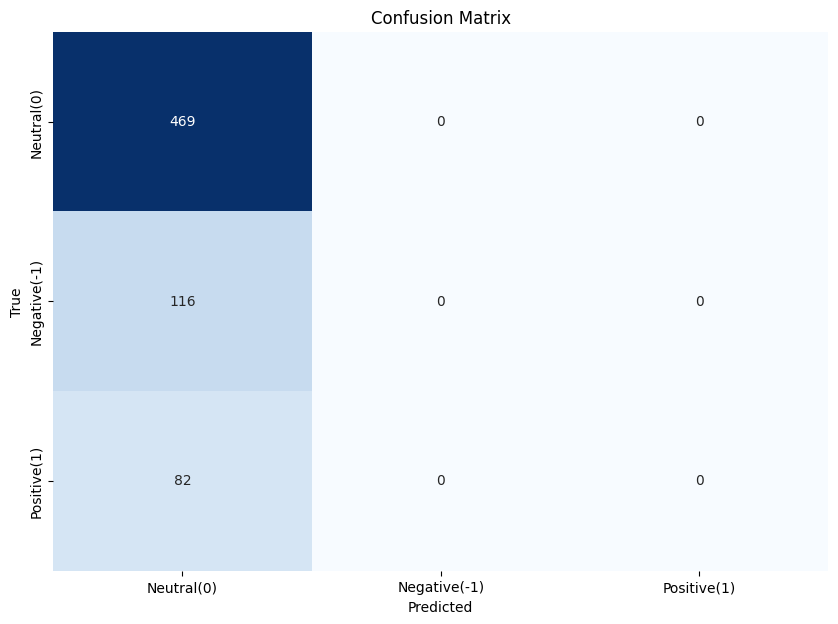

In [75]:
# Create the confusion matrix
cm = confusion_matrix(y_test_indices, y_pred)

label_names = [ 'Neutral(0)', 'Negative(-1)','Positive(1)']

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [29]:
# Set a random seed for reproducibility
random_seed = 42

# Get a random sample of 10 sentences and their corresponding labels
sampled_df = tfidf_df.sample(10, random_state=random_seed)
random_10_sentences = sampled_df['tweets'].tolist()
random_10_labels = sampled_df['tweet_sentiment'].tolist()

KeyError: ignored

In [23]:
random_10_sentences

['coming someone seen lot illini football years',
 'illinois pick 3 day 10 picks 191 981 168 116 706 635 389 698 519 599 date20230501 lottery illinoislottery gambling lotto cash5 cashcows illinois blackownedbusiness blackowned',
 'soon class 2023 graduate want celebrate accomplishments send photo name majorprogram anything else youd like share quotewhats next uic uicpsychology',
 'chicago cubs leather 59fifty available neweracap newdrop neweracap mlb chicagocubs cubs cubtogether chicago illinois leather 59fifty hatcrawler fitted fittedfam thisisthecap 5950 wearyourallegiance',
 'one year ago may 2 2022 magic johnson tweeted bulls one playoff teams httpstcozwalq1snyf basketball chicago chicagobulls illinois nationalbasketballassociation nba nbaeasternconference nbaeasternconferencecentraldivision',
 'chicagos first social equity cannabis manufacturer opens industry diversity efforts lag illinois cannabislegalization cannabisindustry socialequity warondrugs diversityandinclusion diversit

In [24]:
random_10_labels

[0, 0, 1, 0, 0, 0, 0, 1, 0, -1]

In [28]:
sentiment_predictions = get_predictions(random_10_sentences, loaded_model)
predicted_labels = [label_index for label_index in sentiment_predictions]

# Display the sentences with their actual and predicted sentiment labels
for sentence, actual_sentiment, predicted_sentiment in zip(random_10_sentences, random_10_labels, predicted_labels):
    print(f"Sentence: {sentence}\nActual Sentiment: {actual_sentiment}\nPredicted Sentiment: {predicted_sentiment}\n")

ValueError: ignored